# 숙제

* 11/21 오전 수업 다시 보기

# folium

* 설치 : https://python-visualization.github.io/folium/installing.html
* Map을 사용할 수 있게 해주는 라이브러리이다.

> 맵 만들기
> * `folium.Map([위도,경도], 기타 옵션)` : 지도 만들기 . 위도 경도는 리스트[] 혹은 튜플() 형태로 지정이 가능
> * `MAP.save('파일명')` : 파일명으로 지도 저장  
>   
> 맵 만들기 - 옵션
> * `zoom_start=확대정도int` : 확대 정도
> * `tiles = 'Stamen Toner'` : 흑백 지도
> * `tiles = 'Stamen Watercolor'` : 수채화 지도
  
  
> 마커
> * `folium.Marker([마커위도,경도], 옵션들).add_to(마킹할 지도)` : 마커 만들기
>   
> 마커 옵션
> * `popup = '마커 이름'` : 마커 이름 지정
> * `tooltip = '마우스 댔을 때 말풍선'` : 마우스 댔을 때 말풍선 이름
> * `color = '컬러'` : 마커 컬러 지정. red, blue ... 등 몇 가지 지원함
> * `icon=folium.Icon(icon="아이콘")` : 마커 아이콘 지정. cloud, start 등 지원
> * `radius = int` : 마커 중심으로 동그란 원 생성
> * `fill_color='컬러'` : 채우기 색
> * `opacity = int` : 채우기 투명도 지정


## 맵 만들기

In [2]:
import folium

In [17]:
# 맵 만들기 및 저장

m = folium.Map([37.5176577,126.8864088], zoom_start=16)
m.save('map.html')
m

In [13]:
# 맵 만들기 옵션
m = folium.Map([37.5176577,126.8864088], zoom_start=16, tiles='Stamen Toner')
m

In [26]:
# 마커
m = folium.Map([37.5176577,126.8864088], zoom_start=16)
folium.Marker((37.5176577,126.8864088), popup='새싹', tooltip='여기는 어디?!').add_to(m)
folium.Marker((37.5176654,126.8834888), icon=folium.Icon(icon="cloud")).add_to(m)
folium.Marker((37.5196654,126.8884888), radius = 20, fill_color='red', opacity=0.5).add_to(m)
m


In [36]:
# 실습 아래 로또 상점 리스트 마커 추가

# 로또 상점 리스트
lotto = [
{"store":"담배","loc":[37.62585944357624,127.01847823823798]},
{"store":"화곡본마트","loc":[37.54248103738589,126.84414659211494]},
{"store":"용꿈돼지꿈","loc":[37.5447438346992,126.95223862043447]},
{"store":"일이오마켓","loc":[37.47943673430032,126.98346178441342]},
{"store":"여명슈퍼마켓","loc":[37.61432815661055,127.0415039221072]},
{"store":"5가로또레드탑","loc":[37.570756251987575,127.00235901546226]},
{"store":"복권세상","loc":[35.91885025656432,128.55034430109828]},
{"store":"복권전문점","loc":[37.50384327747725,126.71513104367074]},
{"store":"인현동지하가판","loc":[37.47627910055104,126.63147671205866]},
{"store":"CU(광주서동점)","loc":[35.14814807640179,126.90555219336346]},
{"store":"지산로또방","loc":[35.148338888178,126.93203920504686]},
{"store":"천사로또방","loc":[37.63618838692431,127.21107884503209]},
{"store":"오렌지통신","loc":[37.42889361993242,127.10232604117991]},
{"store":"여수복권방","loc":[37.418353650942116,127.12640523182601]},
{"store":"둘리복권방","loc":[37.34532813934063,126.73627994929885]},
{"store":"금성24시편의점","loc":[37.84401249737699,127.06236893072152]},
{"store":"GS25(청주주은점)","loc":[36.60987111587086,127.49134026856717]},
{"store":"장미슈퍼","loc":[36.276304155315685,126.90940713047799]},
{"store":"장미슈퍼","loc":[36.276304155315685,126.90940713047799]},
{"store":"아이24(수송점)","loc":[35.970108052787594,126.7189421934312]},
{"store":"탑로또","loc":[34.87844231008963,128.62803523643754]}
]


# 마커 추가
for i in lotto:
    folium.Marker(i.get("loc"), popup=i.get("store"), tooltip=i.get("store")).add_to(m)

m


## 마커 클러스터 : 마커끼리 묶어 군집 형성

* 가까운 곳의 마커끼리 zoom 단계에 따라 묶는 것  
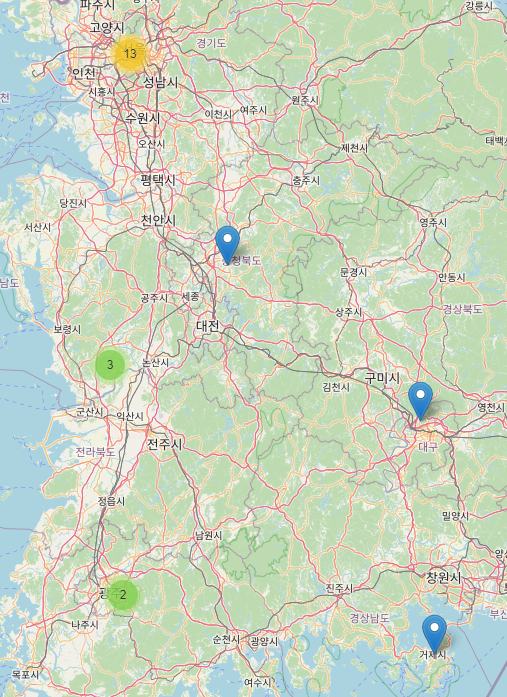

In [38]:
from folium.plugins import MarkerCluster

m = folium.Map([37.5176577,126.8864088], zoom_start=16)
mc = MarkerCluster().add_to(m)
for i in lotto:
    folium.Marker(i.get("loc"), popup=i.get("store"), tooltip=i.get("store")).add_to(mc)

m

## GeoJSON

* 지도 위에 면적 표기 등의 기능을 제공함


In [47]:
import json

m = folium.Map((37.54277566660933,130.91636374950804))

## geo json 파일 불러오기 - 두 단계로 하면 오류 발생 안함
json_data = open('map.geojson','r').read()
json_data = json.loads(json_data)

## 맵에 geoJson 추가
folium.GeoJson(json_data).add_to(m)

JSONDecodeError: Expecting value: line 94 column 7 (char 2121)

# 카카오 지도 API 이용 방법

* https://developers.kakao.com/
  
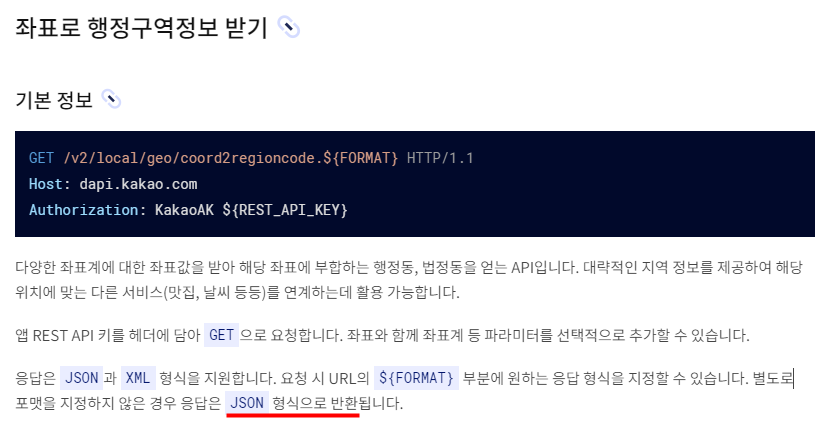

# 실습 : 제주 인구

* 마커로 제주의 동을 모두 표시
* 인구별로 마커의 색상을 다르게 함

> 위경도 : 카카오 API 이용  
> 

In [63]:
# 내 카카오 Dev API 키
REST_API_KEY = '87376327ebc82d4265d05d66c9123651'

## 요청 방법
GET /v2/local/search/address.${FORMAT} HTTP/1.1
Host: dapi.kakao.com
Authorization: KakaoAK ${REST_API_KEY}

### sample
curl -v -X GET "https://dapi.kakao.com/v2/local/search/address.json" \
  -H "Authorization: KakaoAK ${REST_API_KEY}" \
  --data-urlencode "query=전북 삼성동 100" 

In [64]:
# csv 파일 불러오기
import pandas as pd
jeju = pd.read_csv('jeju.csv', encoding='cp949')
jeju.sample(5)

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,Unnamed: 8
16,제주시,외도동,064-728-4892,제주특별자치도 제주시 일주서로 7350 (외도이동),인구 17606명 / 면적 8.4㎢ / 19통 136반,지상 3층·지하 1층 / 연면적 1847.59㎡,총면적 722.56㎡,2019-06-20,NaN
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40 (삼도일동),인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,NaN
27,서귀포시,남원읍,064-760-4118,제주특별자치도 서귀포시 남원읍 태위로 695,인구 19151명 / 면적 188.70㎢ / 17개리 187개반('16.12.31 기준),지상 3층·지하 1층 / 연면적 1044.02㎡,총면적 486m² / 개소일 2000-10-26,2019-06-20,NaN
8,제주시,건입동,064-728-1536,제주특별자치도 제주시 만덕로 18 (건입동),인구 10850명 / 면적2.5㎢ / 20통113반,지상 4층 / 연면적 1192.37㎡,총면적 323.92㎡ / 개소일 2000-12-27,2019-06-20,NaN
41,서귀포시,중문동,064-760-4818,제주특별자치도 서귀포시 1100로 30 (중문동),인구 10684명 / 면적 56.44㎢ / 4통 49반,지상 3층 / 연면적 2407.5㎡,총면적 2407.5㎡ / 개소일 2000-11-02,2019-06-20,NaN


In [65]:
# 데이터 크롤링 라이브러리 : request
import requests as req

In [109]:
# API 를 통해 주소 정보 가져오기 -> r.json 으로 담기
url = 'https://dapi.kakao.com/v2/local/search/address.json?query=오복 3길&size=5'
headers = {'Authorization': f'KakaoAK {REST_API_KEY}'}
r = req.get(url, headers=headers)

In [110]:
# API 통해 가져온 자료 확인
r.json()

{'documents': [{'address': None,
   'address_name': '제주특별자치도 제주시 오복3길',
   'address_type': 'ROAD',
   'road_address': {'address_name': '제주특별자치도 제주시 오복3길',
    'building_name': '',
    'main_building_no': '',
    'region_1depth_name': '제주특별자치도',
    'region_2depth_name': '제주시',
    'region_3depth_name': '이도이동',
    'road_name': '오복3길',
    'sub_building_no': '',
    'underground_yn': 'N',
    'x': '126.534572715873',
    'y': '33.4974753853086',
    'zone_no': ''},
   'x': '126.534572715873',
   'y': '33.4974753853086'}],
 'meta': {'is_end': True, 'pageable_count': 1, 'total_count': 1}}

In [107]:
# 위경도 가져오기
r.json()['documents'][0]['y'], r.json()['documents'][0]['x']

('33.4970469392912', '126.535290947586')

In [123]:
# 관공서만 가져오기
## 카카오 디벨로퍼를 참고해 category_group_code=PO3를 추가함
## 검색 방법을 `search/address` -> `search/keyword` 로 변경
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query=제주특별자치도 제주시 오복3길&category_group_code=PO3&size=10'
headers = {'Authorization': f'KakaoAK {REST_API_KEY}'}

r = req.get(url, headers=headers)

In [124]:
# # 위경도 가져오기
# r.json()['documents'][0]['y'], r.json()['documents'][0]['x']

In [125]:
r.json()

{'documents': [{'address_name': '제주특별자치도 제주시 이도2동 1051-6',
   'category_group_code': 'PO3',
   'category_group_name': '공공기관',
   'category_name': '사회,공공기관 > 지방행정기관 > 행정복지센터 > 주민센터',
   'distance': '',
   'id': '8044178',
   'phone': '064-728-1531',
   'place_name': '이도2동주민센터',
   'place_url': 'http://place.map.kakao.com/8044178',
   'road_address_name': '제주특별자치도 제주시 오복3길 8',
   'x': '126.535290947586',
   'y': '33.4970469392912'}],
 'meta': {'is_end': True,
  'pageable_count': 1,
  'same_name': {'keyword': '', 'region': [], 'selected_region': '제주 제주시 오복3길'},
  'total_count': 1}}

In [127]:
data = pd.read_csv('jeju.csv', encoding='cp949')

In [131]:
data.head(5)

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,Unnamed: 8
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15 (일도일동),인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,NaN
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28 (일도이동),인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,NaN
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17 (이도1동),인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,NaN
3,제주시,이도2동,064-755-2021,제주특별자치도 제주시 오복3길 8 (이도이동),인구 41428명 / 면적 5.4㎢ / 49통 323반,지하 1층·지상 3층 / 연면적 1223.52㎡,총면적 388.9㎡ / 개소일 2000-10-05,2019-06-20,NaN
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40 (삼도일동),인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,NaN


In [133]:
data.drop(columns=['Unnamed: 8'], inplace=True)

In [134]:
data['주소'] = data['주소'].str.split('(').str.get(0)

In [136]:
data.head(2)

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20


In [ ]:
# 주소를 이용해 카카오 로컬 키워드 검색 이용해 '위치' 칼럼에 [y, x] 저장
# 함수(get_yx)를 작성, apply를 이용해서 적용
# 결과값이 없을 경우 '결과없음'으로 처리

In [144]:
# 주소값 반환 함수 만들기

def get_yx(query):
    import requests
    REST_API_KEY = '87376327ebc82d4265d05d66c9123651'
    url = f'https://dapi.kakao.com/v2/local/search/keyword.json?query={query}&category_group_code=PO3&size=10'
    headers = {'Authorization': f'KakaoAK {REST_API_KEY}'}
    r = requests.get(url, headers=headers)
    data = r.json()
    try:
        return [data['documents'][0]['y'], r.json()['documents'][0]['x']]
    except:
        return '결과 없음'


In [145]:
# 함수 테스트
get_yx('오복3길')

['33.4970469392912', '126.535290947586']

In [146]:
# data '주소'에 해당하는 자료들을 get_yx 함수를 통해 연산 -> x, y값 불러오기
data['주소'].apply(get_yx)

0         [33.5150737361162, 126.526342790758]
1                                        결과 없음
2         [33.5069402044009, 126.526976882749]
3         [33.4970469392912, 126.535290947586]
4         [33.5041154034239, 126.517362400655]
5         [33.5117364099539, 126.522210779319]
6      [33.50909779859489, 126.51326647018216]
7         [33.5114717601895, 126.511681792482]
8         [33.5150321080548, 126.531518045311]
9       [33.52021737989457, 126.5654667308753]
10        [33.5218857941584, 126.585599365991]
11        [33.4917232671377, 126.594687244151]
12        [33.4763364526145, 126.545269320539]
13      [33.49512911933711, 126.5115798618361]
14        [33.4881587279011, 126.496886364509]
15        [33.4830787815432, 126.477191625104]
16        [33.4928558848117, 126.432175190874]
17        [33.4997987984561, 126.458099340466]
18        [33.5029008833987, 126.468230562279]
19    [33.410671262551865, 126.26694451906893]
20                                       결과 없음
21     [33.52

In [148]:
# 이를 '위치' 라는 칼럼에 넣기
data['위치'] = data['주소'].apply(get_yx)
data.head(3)

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,위치
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,"[33.5150737361162, 126.526342790758]"
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,결과 없음
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17,인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,"[33.5069402044009, 126.526976882749]"


## 제주 지도 마커 만들기

### (1) for 문 사용해 직접 넣기

In [208]:
# 문제 : 위치 칼럼을 이용해 마커 생성
# tooltip 으로 읍면동 칼럼의 값을 사용해 지도에 표시 (마커 클러스터)
# itterrows() : 특정 행 데이터와 행 인덱스를 iterable 한 list로 반환

# (1) for 문 사용

import folium
from folium.plugins import MarkerCluster

jeju_loc = [33.5150737361162, 126.526342790758]


m_jeju = folium.Map([33.5150737361162, 126.526342790758], zoom_start= 11)
mc = MarkerCluster().add_to(m_jeju)

for index, row in data.iterrows():
    # print(index, row)
    if row['위치'] != '결과 없음':
        folium.Marker(row['위치'], tooltip=row['읍면동']).add_to(mc)
    # folium.Marker(i.get('위치'), tooltip = i.get('읍면동')).add_to(mc)    

m_jeju

### (2) apply 사용

In [ ]:
# (2) apply 사용 ??? 이거 왜 안됐지?

import folium
from folium.plugins import MarkerCluster

m_jeju = folium.Map([33.5150737361162, 126.526342790758], zoom_start= 11)
mc = MarkerCluster().add_to(m_jeju)



In [168]:
# 주소값 반환 함수 만들기

def display(data,map):
    print(data)
    if data[0] != '결과 없음':
        folium.Marker(data[0], tooltip = data[1]).add_to(map)



위치     [33.5150737361162, 126.526342790758]
읍면동                                    일도1동
Name: 0, dtype: object
위치     결과 없음
읍면동     일도2동
Name: 1, dtype: object
위치     [33.5069402044009, 126.526976882749]
읍면동                                    이도1동
Name: 2, dtype: object
위치     [33.4970469392912, 126.535290947586]
읍면동                                    이도2동
Name: 3, dtype: object
위치     [33.5041154034239, 126.517362400655]
읍면동                                    삼도1동
Name: 4, dtype: object
위치     [33.5117364099539, 126.522210779319]
읍면동                                    삼도2동
Name: 5, dtype: object
위치     [33.50909779859489, 126.51326647018216]
읍면동                                       용담1동
Name: 6, dtype: object
위치     [33.5114717601895, 126.511681792482]
읍면동                                    용담2동
Name: 7, dtype: object
위치     [33.5150321080548, 126.531518045311]
읍면동                                     건입동
Name: 8, dtype: object
위치     [33.52021737989457, 126.5654667308753]
읍면동        

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
40    None
41    None
42    None
dtype: object

In [ ]:
# 함수를 적용해 apply
m_jeju2 = data[['위치', '읍면동']].apply(lambda x:display(x, map=mc), axis=1)
m_jeju2

## 인구 현황 지도

### 일반 현황에서 인구수를 추출

In [187]:
data

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,위치,인구수
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,"[33.5150737361162, 126.526342790758]",3146
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,결과 없음,38400
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17,인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,"[33.5069402044009, 126.526976882749]",7418
3,제주시,이도2동,064-755-2021,제주특별자치도 제주시 오복3길 8,인구 41428명 / 면적 5.4㎢ / 49통 323반,지하 1층·지상 3층 / 연면적 1223.52㎡,총면적 388.9㎡ / 개소일 2000-10-05,2019-06-20,"[33.4970469392912, 126.535290947586]",41428
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40,인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,"[33.5041154034239, 126.517362400655]",14281
5,제주시,삼도2동,064-728-4562,제주특별자치도 제주시 관덕로6길 15,인구 9431명 / 면적0.83㎢ / 19통109반,지하 1층·지상3층 / 연면적 814㎡,총면적 368.69㎡ / 개소일 2000-12-30,2019-06-20,"[33.5117364099539, 126.522210779319]",9431
6,제주시,용담1동,064-728-4592,제주특별자치도 제주시 용남3길 11,인구 8368명 / 면적0.61㎢ / 15통102반,지상 3층 / 대지면적 8825㎡ / 건축면적 428.55,연면적 112049㎡ / 개소일 2000-12-24,2019-06-20,"[33.50909779859489, 126.51326647018216]",8368
7,제주시,용담2동,064-728-1535,제주특별자치도 제주시 흥운길 27,인구 16701명 / 면적 4.94㎢ / 23통 155반,지상 3층 지하 1층 / 연면적 1046.13㎡,총면적 449.55㎡ / 개관일 2000-12-30,2019-06-20,"[33.5114717601895, 126.511681792482]",16701
8,제주시,건입동,064-728-1536,제주특별자치도 제주시 만덕로 18,인구 10850명 / 면적2.5㎢ / 20통113반,지상 4층 / 연면적 1192.37㎡,총면적 323.92㎡ / 개소일 2000-12-27,2019-06-20,"[33.5150321080548, 126.531518045311]",10850
9,제주시,화북동,064-728-4682,제주특별자치도 제주시 진남로6길 17,인구 25559('17.5월 현재) / 면적8.28㎢ / 33통 205반,지하 1층·지상3층 / 연면적 2375.80㎡,연면적 54㎡ / 개소일 2000-12-27,2019-06-20,"[33.52021737989457, 126.5654667308753]",25559


In [198]:
# 일반현황에서 인구수 추출 -> '인구수' 칼럼을 추가하기. 데이터 타입은 정수형태

## (1) 일반현황에서 인구수 뽑아내기
list_pop = data['일반현황'].tolist()
list_pop = [[i.split('/') for i in list_pop][i][0] for i in range(len(list_pop))]
list_pop = [i.replace("인구","").replace("2082 가구","") for i in list_pop]
list_pop = [i[:6].replace('명','') for i in list_pop]
list_pop = [int(i) for i in list_pop]
print(list_pop)

### 인구수 뽑아내기 -> 숫자만 뽑아내는 다른 방법이 있음
### re 라이브러리
### import re
### data['일반현황'].apply(lambda x : re.search('([0-9]{4})', x).group()))



## (2) 뽑아낸 인구수를 data에 '인구수' 칼럼에 추가
data['인구수'] = list_pop
data




[3146, 38400, 7418, 41428, 14281, 9431, 8368, 16701, 10850, 25559, 25000, 3046, 28741, 13729, 39897, 56223, 17606, 4104, 2837, 19925, 26539, 15080, 20804, 8745, 2820, 1718, 16610, 19151, 13866, 11867, 11167, 5207, 2444, 4003, 3798, 5475, 4980, 22225, 10697, 10344, 11310, 10684, 3813]


,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,위치,인구수,id
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,"[33.5150737361162, 126.526342790758]",3146,Jeju
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,결과 없음,38400,Jeju
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17,인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,"[33.5069402044009, 126.526976882749]",7418,Jeju
3,제주시,이도2동,064-755-2021,제주특별자치도 제주시 오복3길 8,인구 41428명 / 면적 5.4㎢ / 49통 323반,지하 1층·지상 3층 / 연면적 1223.52㎡,총면적 388.9㎡ / 개소일 2000-10-05,2019-06-20,"[33.4970469392912, 126.535290947586]",41428,Jeju
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40,인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,"[33.5041154034239, 126.517362400655]",14281,Jeju
5,제주시,삼도2동,064-728-4562,제주특별자치도 제주시 관덕로6길 15,인구 9431명 / 면적0.83㎢ / 19통109반,지하 1층·지상3층 / 연면적 814㎡,총면적 368.69㎡ / 개소일 2000-12-30,2019-06-20,"[33.5117364099539, 126.522210779319]",9431,Jeju
6,제주시,용담1동,064-728-4592,제주특별자치도 제주시 용남3길 11,인구 8368명 / 면적0.61㎢ / 15통102반,지상 3층 / 대지면적 8825㎡ / 건축면적 428.55,연면적 112049㎡ / 개소일 2000-12-24,2019-06-20,"[33.50909779859489, 126.51326647018216]",8368,Jeju
7,제주시,용담2동,064-728-1535,제주특별자치도 제주시 흥운길 27,인구 16701명 / 면적 4.94㎢ / 23통 155반,지상 3층 지하 1층 / 연면적 1046.13㎡,총면적 449.55㎡ / 개관일 2000-12-30,2019-06-20,"[33.5114717601895, 126.511681792482]",16701,Jeju
8,제주시,건입동,064-728-1536,제주특별자치도 제주시 만덕로 18,인구 10850명 / 면적2.5㎢ / 20통113반,지상 4층 / 연면적 1192.37㎡,총면적 323.92㎡ / 개소일 2000-12-27,2019-06-20,"[33.5150321080548, 126.531518045311]",10850,Jeju
9,제주시,화북동,064-728-4682,제주특별자치도 제주시 진남로6길 17,인구 25559('17.5월 현재) / 면적8.28㎢ / 33통 205반,지하 1층·지상3층 / 연면적 2375.80㎡,연면적 54㎡ / 개소일 2000-12-27,2019-06-20,"[33.52021737989457, 126.5654667308753]",25559,Jeju


### JSON 형태에 맞게 데이터 넣기

In [197]:
# 제주시와 서귀포시 id 값 반환 : json과 일치화
## id:"Jeju"
## id:"Seogwipo"

print(data['지역'].values)
data['id'] = data['지역'].replace(['제주시','서귀포시'], ['Jeju','Seogwipo'])
data

['제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시'
 '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시' '제주시'
 '제주시' '제주시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시'
 '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시' '서귀포시']


,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,위치,인구수,id
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,"[33.5150737361162, 126.526342790758]",3146,Jeju
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,결과 없음,38400,Jeju
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17,인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,"[33.5069402044009, 126.526976882749]",7418,Jeju
3,제주시,이도2동,064-755-2021,제주특별자치도 제주시 오복3길 8,인구 41428명 / 면적 5.4㎢ / 49통 323반,지하 1층·지상 3층 / 연면적 1223.52㎡,총면적 388.9㎡ / 개소일 2000-10-05,2019-06-20,"[33.4970469392912, 126.535290947586]",41428,Jeju
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40,인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,"[33.5041154034239, 126.517362400655]",14281,Jeju
5,제주시,삼도2동,064-728-4562,제주특별자치도 제주시 관덕로6길 15,인구 9431명 / 면적0.83㎢ / 19통109반,지하 1층·지상3층 / 연면적 814㎡,총면적 368.69㎡ / 개소일 2000-12-30,2019-06-20,"[33.5117364099539, 126.522210779319]",9431,Jeju
6,제주시,용담1동,064-728-4592,제주특별자치도 제주시 용남3길 11,인구 8368명 / 면적0.61㎢ / 15통102반,지상 3층 / 대지면적 8825㎡ / 건축면적 428.55,연면적 112049㎡ / 개소일 2000-12-24,2019-06-20,"[33.50909779859489, 126.51326647018216]",8368,Jeju
7,제주시,용담2동,064-728-1535,제주특별자치도 제주시 흥운길 27,인구 16701명 / 면적 4.94㎢ / 23통 155반,지상 3층 지하 1층 / 연면적 1046.13㎡,총면적 449.55㎡ / 개관일 2000-12-30,2019-06-20,"[33.5114717601895, 126.511681792482]",16701,Jeju
8,제주시,건입동,064-728-1536,제주특별자치도 제주시 만덕로 18,인구 10850명 / 면적2.5㎢ / 20통113반,지상 4층 / 연면적 1192.37㎡,총면적 323.92㎡ / 개소일 2000-12-27,2019-06-20,"[33.5150321080548, 126.531518045311]",10850,Jeju
9,제주시,화북동,064-728-4682,제주특별자치도 제주시 진남로6길 17,인구 25559('17.5월 현재) / 면적8.28㎢ / 33통 205반,지하 1층·지상3층 / 연면적 2375.80㎡,연면적 54㎡ / 개소일 2000-12-27,2019-06-20,"[33.52021737989457, 126.5654667308753]",25559,Jeju


In [204]:
# json 의 데이터 형식과 일치화
result = data.groupby(['id'])['인구수'].sum()
result

id
Jeju        462396
Seogwipo    167641
Name: 인구수, dtype: int64

### 인구 현황 지도 작성

In [217]:
# 인구수 분포 지도

jeju_loc = [33.5150737361162, 126.526342790758]
m = folium.Map(jeju_loc, zoom_start=11)

jsonfile = open('jejusi.json', 'r')
jsondata = json.loads(jsonfile.read())

folium.Choropleth(jsondata,
                  data=result,
                  columns=['id', '인구수'],
                  key_on='feature.id').add_to(m)

m

## 인구 현황 지도 (2)

In [215]:
data

,지역,읍면동,전화번호,주소,일반현황,청사현황,자치센터현황,데이터기준일자,위치,인구수,id
0,제주시,일도1동,064-728-4412,제주특별자치도 제주시 중앙로7길 15,인구 3146명 / 면적 0.33㎢ / 11통 61개반,지상 3층 / 연면적 585㎡,개소일 2000-12-20,2019-06-20,"[33.5150737361162, 126.526342790758]",3146,Jeju
1,제주시,일도2동,064-728-4442,제주특별자치도 제주시 고마로 28,인구 38400명 / 면적2.18㎢ / 48통326반,지상 2층·지하 1층 / 연면적 1307.01,총면적 617.22㎡ / 개소일 2000-12-24,2019-06-20,결과 없음,38400,Jeju
2,제주시,이도1동,064-728-1530,제주특별자치도 제주시 중앙로25길 17,인구 7418명 / 면적 0.79㎢ / 16통 97개반,지상 2층 / 2층면적 205㎡,개소일 2000-12-28,2019-06-20,"[33.5069402044009, 126.526976882749]",7418,Jeju
3,제주시,이도2동,064-755-2021,제주특별자치도 제주시 오복3길 8,인구 41428명 / 면적 5.4㎢ / 49통 323반,지하 1층·지상 3층 / 연면적 1223.52㎡,총면적 388.9㎡ / 개소일 2000-10-05,2019-06-20,"[33.4970469392912, 126.535290947586]",41428,Jeju
4,제주시,삼도1동,064-728-4532,제주특별자치도 제주시 전농로 40,인구 14281명 / 면적0.87㎢ / 18통122반,지하 1층·지상3층 / 연면적 2070.37㎡,총면적 456.55㎡,2019-06-20,"[33.5041154034239, 126.517362400655]",14281,Jeju
5,제주시,삼도2동,064-728-4562,제주특별자치도 제주시 관덕로6길 15,인구 9431명 / 면적0.83㎢ / 19통109반,지하 1층·지상3층 / 연면적 814㎡,총면적 368.69㎡ / 개소일 2000-12-30,2019-06-20,"[33.5117364099539, 126.522210779319]",9431,Jeju
6,제주시,용담1동,064-728-4592,제주특별자치도 제주시 용남3길 11,인구 8368명 / 면적0.61㎢ / 15통102반,지상 3층 / 대지면적 8825㎡ / 건축면적 428.55,연면적 112049㎡ / 개소일 2000-12-24,2019-06-20,"[33.50909779859489, 126.51326647018216]",8368,Jeju
7,제주시,용담2동,064-728-1535,제주특별자치도 제주시 흥운길 27,인구 16701명 / 면적 4.94㎢ / 23통 155반,지상 3층 지하 1층 / 연면적 1046.13㎡,총면적 449.55㎡ / 개관일 2000-12-30,2019-06-20,"[33.5114717601895, 126.511681792482]",16701,Jeju
8,제주시,건입동,064-728-1536,제주특별자치도 제주시 만덕로 18,인구 10850명 / 면적2.5㎢ / 20통113반,지상 4층 / 연면적 1192.37㎡,총면적 323.92㎡ / 개소일 2000-12-27,2019-06-20,"[33.5150321080548, 126.531518045311]",10850,Jeju
9,제주시,화북동,064-728-4682,제주특별자치도 제주시 진남로6길 17,인구 25559('17.5월 현재) / 면적8.28㎢ / 33통 205반,지하 1층·지상3층 / 연면적 2375.80㎡,연면적 54㎡ / 개소일 2000-12-27,2019-06-20,"[33.52021737989457, 126.5654667308753]",25559,Jeju


In [219]:
jeju_loc = [33.5150737361162, 126.526342790758]
m = folium.Map(jeju_loc, zoom_start=11)

jsonfile = open('jeju.json', 'r')
jsondata = json.loads(jsonfile.read())

folium.Choropleth(jsondata,
                  data=data,
                  columns=['읍면동', '인구수'],
                  key_on='feature.id').add_to(m)

m

# 실습2. : 대한민국 총인구 지도

# 11/21 실습 : 부산 인구

## 오후 실습

In [1]:
import = [35.1795543, 129.0756416]
m = folium.Map(loc, zoon_start=11)
folium.Choropleth(gep_data = json_busan, data=busan, columns = ['ehd', 'chddlsrntn'], key_on='feature.id').add_to(m)
m

#없는 데이터 : json_busan

SyntaxError: invalid syntax (1207143338.py, line 1)

In [2]:
json_dong = sorted(json_dong)
json_dong

#없는 데이터 : json_dong

NameError: name 'json_dong' is not defined

In [4]:
df_dong = sorted(busan['동'])
df_dong

NameError: name 'busan' is not defined

In [5]:
# 두 데이터의 동의 갯수가 동일한지 확인
len(json_dong), len(df_dong)

for i , item in enumerate(zip(df_dong, json_dong)):
    print(i, item)

NameError: name 'json_dong' is not defined

In [6]:
json_dong = sorted(json_dong)
df_dong = sorted(busan['동'])
for i , item in enumerate(zip(df_dong,json_dong)):
    print(i,item)

NameError: name 'json_dong' is not defined

In [8]:
busan['동'] = busan['동'].str.replace['제',''].to_list()

NameError: name 'busan' is not defined

* str.replace => 부분 일치도 replace  
* 그냥 .replace => 전체 일치일 경우 replace